<a href="https://colab.research.google.com/github/koleshjr/KENYAN-SIGN-LANGUAGE-CLASSIFICATION/blob/main/Vit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Model 1

### Install and Import Necessary libraries

In [ ]:
!pip install -U albumentations
!pip install opencv-python==4.5.4.60
!pip install timm==0.6.2.dev0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.5/123.5 KB 2.7 MB/s eta 0:00:00
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.2.1
    Uninstalling albumentations-1.2.1:
      Successfully uninstalled albumentations-1.2.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.3/60.3 MB 14.0 MB/s eta 0:00:00
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.6.0.66
    Uninstalling opencv-python-4.6.0.66:
      Successfully uninstalled opencv-python-4.6.0.66
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.9/497.9 KB 23.9 MB/s eta 0:00:00


In [ ]:

import torch
torch.cuda.empty_cache()

In [ ]:
import os
import albumentations
from albumentations.pytorch import ToTensorV2
import pandas as pd
import numpy as np
import gc
import timm

In [ ]:
from fastai.vision.all import *

### Seed For Reproducibility

In [ ]:
def random_seed(seed_value, use_cuda): 
    np.random.seed(seed_value)
 #cpu vars
    torch.manual_seed(seed_value) 
# cpu  vars
    random.seed(seed_value)
 # Python 
    if use_cuda: 
        torch.cuda.manual_seed(seed_value) 
        torch.cuda.manual_seed_all(seed_value) 
# gpu vars
        torch.backends.cudnn.deterministic = True 
 #needed
        torch.backends.cudnn.benchmark = False 
#Remember to use num_workers=0 when creating the DataBunch.



In [ ]:
random_seed(2022,True)

In [ ]:
#Start by connecting gdrive into the google colab

from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Unzip The Images

In [ ]:
!unzip -o -q /content/gdrive/MyDrive/sign_prediction/ModImages -d Images/ 

### Load the Data

In [ ]:
path = '/content/gdrive/MyDrive/sign_prediction/'

df = pd.read_csv(path + 'Train.csv')


df.img_IDS    = ["/content/Images/content/ModImages/"+i+".jpg" for i in df.img_IDS]

df.head()

,img_IDS,Label
0,/content/Images/content/ModImages/ImageID_33HMDMJ3.jpg,Temple
1,/content/Images/content/ModImages/ImageID_V5POEX4O.jpg,Church
2,/content/Images/content/ModImages/ImageID_89CCCCW6.jpg,Enough/Satisfied
3,/content/Images/content/ModImages/ImageID_GNJXOWX5.jpg,Me
4,/content/Images/content/ModImages/ImageID_7Q9LOP7R.jpg,Love


In [ ]:
# issues = [
# ("/content/Images/content/ModImages/ImageID_2OK3T60A.jpg", "Church"),
# ("/content/Images/content/ModImages/ImageID_TSDTGVSP.jpg","Church"),
# ("/content/Images/content/ModImages/ImageID_Z9R5974U.jpg", "Mosque"),
# ("/content/Images/content/ModImages/ImageID_NX8DEEOB.jpg", "Church"),
# ("/content/Images/content/ModImages/ImageID_8DG4BZVU.jpg", "Enough/Satisfied"),
# ("/content/Images/content/ModImages/ImageID_44IZ9AMM.jpg","Mosque"),
# ("/content/Images/content/ModImages/ImageID_N8F9Y28D.jpg", "Love"),
# ("/content/Images/content/ModImages/ImageID_EX8EVQ7A.jpg", ""),
# ("/content/Images/content/ModImages/ImageID_VCY3SUBA.jpg", "Enough/Satisfied"),
# ("/content/Images/content/ModImages/ImageID_HB7CEIP5.jpg","Church"),
# ("/content/Images/content/ModImages/ImageID_0C7FSZ03.jpg","You"),
# ("/content/Images/content/ModImages/ImageID_DRZPQNVU.jpg", "Me"),
# ("/content/Images/content/ModImages/ImageID_W5YJTE0R.jpg", "Church"),
# ("/content/Images/content/ModImages/ImageID_YE1WRYCD.jpg","Mosque"),
# ("/content/Images/content/ModImages/ImageID_NX8DEEOB.jpg","Mosque"),
# ("/content/Images/content/ModImages/ImageID_SP8Y5BEN.jpg","Church"),
# ("/content/Images/content/ModImages/ImageID_DKH9T5LV.jpg",""),
# ("/content/Images/content/ModImages/ImageID_NL71ON8Y.jpg",""),
# ("/content/Images/content/ModImages/ImageID_BXWESWG5.jpg","Mosque"),
# ("/content/Images/content/ModImages/ImageID_WK885JRM.jpg",""),
# ("/content/Images/content/ModImages/ImageID_E1RRXW2N.jpg","Church"),
# ("/content/Images/content/ModImages/ImageID_VJPPH215.jpg","Enough/Satisfied"),
# ("/content/Images/content/ModImages/ImageID_SPLFHVZM.jpg", "Church"),
# ("/content/Images/content/ModImages/ImageID_7XFH50C2.jpg", "Temple"),
# ("/content/Images/content/ModImages/ImageID_20EMNL7G.jpg", "You"),
# ("/content/Images/content/ModImages/ImageID_2CIWXSFB.jpg", "You")
# ]



# for x,y in issues:
#   df.loc[df['img_IDS'] == x, 'Label'] = y



# df.loc[df['Label'] == ""].index.values.tolist
# df = df.drop(df.loc[df['Label'] == ""].index.values.tolist(), axis = 0).reset_index(drop=True)



In [ ]:
df.Label.value_counts()

Enough/Satisfied    695
Mosque              695
Seat                695
Temple              694
Church              694
Me                  694
Love                694
You                 694
Friend              694
Name: Label, dtype: int64

In [ ]:
data_path =Path('/content/gdrive/MyDrive/sign_prediction')

### Augmentations using Albumentations

In [ ]:
class AlbumentationsTransform (RandTransform):
    split_idx,order=None,2
    def __init__(self, train_aug, valid_aug): store_attr()
    
    def before_call(self, b, split_idx):
        self.idx = split_idx
    
    def encodes(self, img: PILImage):
        if self.idx == 0:
            aug_img = self.train_aug(image=np.array(img))['image']
        else:
            aug_img = self.valid_aug(image=np.array(img))['image']
        return PILImage.create(aug_img)

In [ ]:
def get_train_aug(): return albumentations.Compose([
            albumentations.Resize(224, 224), #Extra tip, use size that's suitable for the efficentNetwork you are using.
            albumentations.RandomCrop(224,224),
            albumentations.CenterCrop(224,224),
            albumentations.Rotate(limit=(-90, 90)),
            albumentations.HorizontalFlip(p=0.5),
            albumentations.VerticalFlip(p=0.5),
            albumentations.RandomBrightnessContrast(
                brightness_limit=(-0.1,0.1), 
                contrast_limit=(-0.1, 0.1), 
                p=0.5
            ),
            albumentations.HueSaturationValue(
                hue_shift_limit=0.2, 
                sat_shift_limit=0.2, 
                val_shift_limit=0.2, 
                p=0.5
            ),
            albumentations.ColorJitter(),
            albumentations.Blur(),
            ], p=1.)



def get_valid_aug(): return albumentations.Compose([
            albumentations.Resize(224, 224),
            ], p=1.0)

item_tfms = AlbumentationsTransform(get_train_aug(), get_valid_aug())
batch_tfms = [Normalize.from_stats(*imagenet_stats)]

In [ ]:
df.head()

,img_IDS,Label
0,/content/Images/content/ModImages/ImageID_33HMDMJ3.jpg,Temple
1,/content/Images/content/ModImages/ImageID_V5POEX4O.jpg,Church
2,/content/Images/content/ModImages/ImageID_89CCCCW6.jpg,Enough/Satisfied
3,/content/Images/content/ModImages/ImageID_GNJXOWX5.jpg,Me
4,/content/Images/content/ModImages/ImageID_7Q9LOP7R.jpg,Love


### DataLoader

In [ ]:
block = DataBlock(blocks=(ImageBlock, CategoryBlock), 
    splitter=TrainTestSplitter(0.05, stratify=df["Label"]),
    get_x = ColReader(0),
    item_tfms=item_tfms, 
    get_y=ColReader(1),
    batch_tfms = batch_tfms
    )


In [ ]:
dls = block.dataloaders(df, bs=8)

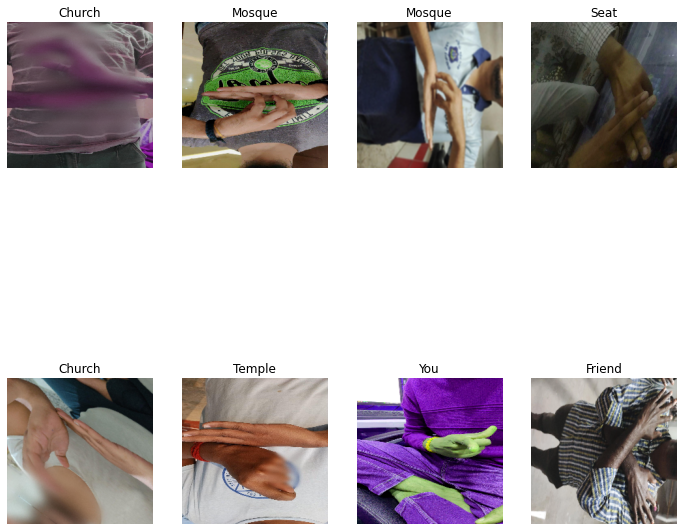

In [ ]:
dls.show_batch(figsize=(12,12))

In [ ]:
from fastai.metrics import accuracy

In [ ]:
timm.list_models('vit*')

['vit_base_patch8_224',
 'vit_base_patch8_224_dino',
 'vit_base_patch8_224_in21k',
 'vit_base_patch16_18x2_224',
 'vit_base_patch16_224',
 'vit_base_patch16_224_dino',
 'vit_base_patch16_224_in21k',
 'vit_base_patch16_224_miil',
 'vit_base_patch16_224_miil_in21k',
 'vit_base_patch16_224_sam',
 'vit_base_patch16_384',
 'vit_base_patch16_plus_240',
 'vit_base_patch16_rpn_224',
 'vit_base_patch32_224',
 'vit_base_patch32_224_in21k',
 'vit_base_patch32_224_sam',
 'vit_base_patch32_384',
 'vit_base_patch32_plus_256',
 'vit_base_r26_s32_224',
 'vit_base_r50_s16_224',
 'vit_base_r50_s16_224_in21k',
 'vit_base_r50_s16_384',
 'vit_base_resnet26d_224',
 'vit_base_resnet50_224_in21k',
 'vit_base_resnet50_384',
 'vit_base_resnet50d_224',
 'vit_giant_patch14_224',
 'vit_gigantic_patch14_224',
 'vit_huge_patch14_224',
 'vit_huge_patch14_224_in21k',
 'vit_large_patch14_224',
 'vit_large_patch16_224',
 'vit_large_patch16_224_in21k',
 'vit_large_patch16_384',
 'vit_large_patch32_224',
 'vit_large_patch

### Training and Ealuation

In [ ]:
learn = vision_learner(dls, 'vit_large_patch16_224',  metrics=[accuracy], cbs=[GradientAccumulation(),SaveModelCallback(),EarlyStoppingCallback(patience=3)])
learn.to_fp16()

In [ ]:
# del variables
gc.collect()

15257

SuggestedLRs(valley=0.0020892962347716093)

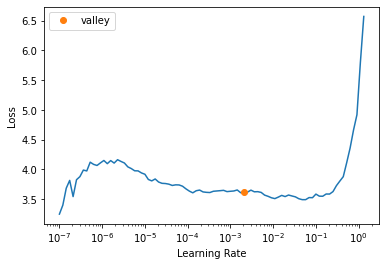

In [ ]:
learn.lr_find()

In [ ]:
learn.fine_tune(15,0.001737800776027143)

epoch,train_loss,valid_loss,accuracy,time
0,2.080266,1.188364,0.594249,03:22


Better model found at epoch 0 with valid_loss value: 1.1883635520935059.


epoch,train_loss,valid_loss,accuracy,time
0,1.148686,0.637893,0.769968,04:29
1,0.759332,0.431806,0.859425,04:28
2,0.574744,0.367344,0.900958,04:29


Better model found at epoch 0 with valid_loss value: 0.6378929018974304.
Better model found at epoch 1 with valid_loss value: 0.43180593848228455.
Better model found at epoch 2 with valid_loss value: 0.3673442006111145.


epoch,train_loss,valid_loss,accuracy,time
0,1.148686,0.637893,0.769968,04:29
1,0.759332,0.431806,0.859425,04:28
2,0.574744,0.367344,0.900958,04:29
3,0.539383,0.244088,0.932907,04:28
4,0.384775,0.296801,0.926518,04:29
5,0.329051,0.220709,0.923323,04:29
6,0.293223,0.220626,0.948882,04:27
7,0.268088,0.200107,0.942492,04:28
8,0.246597,0.231220,0.939297,04:28
9,0.148670,0.229873,0.948882,04:28


Better model found at epoch 3 with valid_loss value: 0.24408775568008423.
Better model found at epoch 5 with valid_loss value: 0.22070930898189545.
Better model found at epoch 6 with valid_loss value: 0.2206255942583084.
Better model found at epoch 7 with valid_loss value: 0.2001071572303772.


Better model found at epoch 13 with valid_loss value: 0.011384588666260242

In [ ]:
learn.export(path + 'ksl_model.pkl')
learn.to_fp32()

### Inference

In [ ]:
sample_df = pd.read_csv(data_path/'SampleSubmission.csv')
sample_df.head()

,img_IDS,Church,Enough/Satisfied,Friend,Love,Me,Mosque,Seat,Temple,You
0,ImageID_USRB8QNG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ImageID_SZ8D1ZJI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ImageID_4OJO2F8J,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ImageID_IEE4XV0B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ImageID_BP0O0WZ9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
sample_copy = sample_df.copy()



sample_df.img_IDS    = ["/content/Images/content/ModImages/"+i+".jpg" for i in sample_df.img_IDS]

sample_df.head()

,img_IDS,Church,Enough/Satisfied,Friend,Love,Me,Mosque,Seat,Temple,You
0,/content/Images/content/ModImages/ImageID_USRB8QNG.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,/content/Images/content/ModImages/ImageID_SZ8D1ZJI.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,/content/Images/content/ModImages/ImageID_4OJO2F8J.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,/content/Images/content/ModImages/ImageID_IEE4XV0B.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,/content/Images/content/ModImages/ImageID_BP0O0WZ9.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
test_dl = learn.dls.test_dl(sample_df)

In [ ]:
preds, _ = learn.tta(dl=test_dl, n=15)
preds[:,1]

tensor([4.7012e-05, 9.8873e-01, 9.7941e-05,  ..., 1.0990e-04, 1.0707e-04,
        4.4147e-05])

In [ ]:
k=[]
for col in sample_df.columns: 
  k.append(col) # creating list of the label

k

['img_IDS',
 'Church',
 'Enough/Satisfied',
 'Friend',
 'Love',
 'Me',
 'Mosque',
 'Seat',
 'Temple',
 'You']

In [ ]:
# sample_copy

In [ ]:
import os
submission = pd.DataFrame()
submission["img_IDS"] = sample_copy["img_IDS"]
for i, c in enumerate(learn.dls.vocab):
  print(c)
  submission[c] = preds[:,i]
submission.head()

Church
Enough/Satisfied
Friend
Love
Me
Mosque
Seat
Temple
You


,img_IDS,Church,Enough/Satisfied,Friend,Love,Me,Mosque,Seat,Temple,You
0,ImageID_USRB8QNG,0.004880,0.000047,0.000002,0.000009,0.000010,0.000742,0.000006,0.994257,0.000046
1,ImageID_SZ8D1ZJI,0.009335,0.988732,0.000126,0.000030,0.000098,0.001616,0.000008,0.000032,0.000023
2,ImageID_4OJO2F8J,0.001568,0.000098,0.000200,0.000639,0.000021,0.997236,0.000055,0.000154,0.000029
3,ImageID_IEE4XV0B,0.000842,0.000100,0.000158,0.000164,0.000222,0.996900,0.000071,0.001099,0.000443
4,ImageID_BP0O0WZ9,0.000017,0.000011,0.000009,0.000001,0.000044,0.000008,0.000390,0.000062,0.999457


In [ ]:
submission.to_csv('./vit_large_patch16_224.csv', index=False)

In [ ]:
learn.recorder.final_record 

(#3) [0.12306532263755798,0.23112231492996216,0.9488818049430847]